# Artificial neural network

Author : Akhila Ashok \
Method : RMSProp \
Dataset used : wdbc.csv \
Reference : Moodle slides of ANN 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rms import *

In [2]:
df = pd.read_csv("./wdbc/wdbc_train.csv",sep=";",)
df

,Malignant,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,0,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,...,13.32,26.21,88.91,543.9,0.13580,0.1892,0.19560,0.07909,0.3168,0.07987
1,0,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.14260,0.2378,0.26710,0.10150,0.3014,0.08750
2,0,14.62,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,...,16.11,29.11,102.90,803.7,0.11150,0.1766,0.09189,0.06946,0.2522,0.07246
3,1,18.65,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,...,22.82,21.32,150.60,1567.0,0.16790,0.5090,0.73450,0.23780,0.3799,0.09185
4,0,12.67,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,...,13.71,21.10,88.70,574.4,0.13840,0.1212,0.10200,0.05602,0.2688,0.06888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,...,12.47,23.03,79.15,478.6,0.14830,0.1574,0.16240,0.08542,0.3060,0.06783
394,1,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,...,19.92,25.27,129.00,1233.0,0.13140,0.2236,0.28020,0.12160,0.2792,0.08158
395,0,11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,...,12.12,15.82,79.62,453.5,0.08864,0.1256,0.12010,0.03922,0.2576,0.07018
396,1,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,...,27.66,25.80,195.00,2227.0,0.12940,0.3885,0.47560,0.24320,0.2741,0.08574


In [3]:
x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
print("y:", y_train)
print("X.shape:", x_train.shape)

y: [0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1
 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1
 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0
 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0]
X.shape: (398, 30)


In [4]:
means, sds = get_mean_std(x_train)
x_train = normalization(x_train, means=means, sds=sds) # zero mean and unit variance
print("Old standard deviations:", sds)
meansNew, sdsNew = get_mean_std(x_train)
print("Old means:", meansNew)
print("New standard deviations:", sdsNew)

Old standard deviations: [3.59364465e+00 4.28497098e+00 2.48201309e+01 3.65680598e+02
 1.38887240e-02 5.20826585e-02 8.08028414e-02 3.91187547e-02
 2.67346831e-02 6.86881510e-03 2.94232543e-01 5.26746288e-01
 2.16614255e+00 5.02399884e+01 2.97919134e-03 1.90177008e-02
 3.35974131e-02 6.39426794e-03 7.50954668e-03 2.77196336e-03
 4.90072619e+00 6.14912731e+00 3.43431266e+01 5.85007468e+02
 2.25287891e-02 1.61139977e-01 2.15073090e-01 6.59844461e-02
 6.06059061e-02 1.81047581e-02]
Old means: [-3.12424570e-16 -3.01266549e-16 -2.45476448e-16 -1.51749077e-16
 -4.61942042e-16  1.69601909e-16  1.42822660e-16 -1.69601909e-16
 -1.27647753e-15 -2.56634468e-16 -1.74065117e-16  1.82991534e-16
 -1.24969828e-16  4.01688733e-17  1.02653787e-16  2.23160407e-17
 -1.02653787e-16  2.85645321e-16  4.32931190e-16  1.07116995e-16
 -4.64173646e-16 -8.92641628e-17  1.29433036e-16  8.48009546e-17
  2.14233991e-16 -8.03377465e-17 -4.46320814e-17  9.81905791e-17
 -1.60675493e-16  6.24849139e-16]
New standard dev

In [5]:
#Training model with rmsprop

In [6]:
def train_model_with_rms_prop(x_train, y_train, hidden_neurons, T, alpha, early_stopping):
    np.random.seed(777)
    # randomly initialize parameters
    parameters = initialize_weights(x_train, hidden_neurons)
    rms_prop = {"W1_mean_squared": 0, "B1_mean_squared": 0,
                "W2_mean_squared": 0, "B2_mean_squared": 0}
    epsilon = 1e-8
    loss = []
    last_loss = np.infty
    conv = 0
    for t in range(T):
        A1, A2 = vectorized_forward_propagation(x_train, parameters)
        l = compute_loss(y_train, A2)
        if early_stopping and last_loss - l < 1e-5:
            conv += 1
        else:
            conv = 0
        if conv >= 10:
            print("Converged at t with RMSProp:", t)
            break
        last_loss = l
        loss.append(l)
        parameters, rms_prop = vectorized_backward_propagation_with_rms(
            x_train, y_train, A1, A2, parameters, rms_prop, alpha, epsilon)
    return loss, parameters


def train_model(x_train, y_train, hidden_neurons, T, alpha, earlyStopping):
    np.random.seed(777)
    # randomly initialize parameters
    parameters = initialize_weights(x_train, hidden_neurons)
    loss = []
    last_loss = np.infty
    conv = 0
    for t in range(T):
        A1, A2 = vectorized_forward_propagation(x_train, parameters)
        l = compute_loss(y_train, A2)
        if earlyStopping and last_loss - l < 1e-5:
            conv += 1
        else:
            conv = 0
        if conv >= 10:
            print("Converged at t:", t)
            break
        last_loss = l
        loss.append(l)
        parameters = vectorized_backward_propagation(
            x_train, y_train, A1, A2, parameters, alpha=alpha)
    return loss, parameters

Converged at t: 7519
Converged at t with RMSProp: 445


Text(0, 0.5, 'SSE')

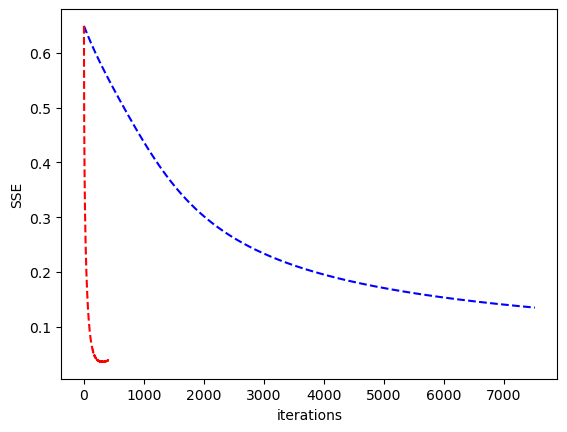

In [7]:
loss, parameters1 = train_model(x_train, y_train, 7, 10000, 0.01, True)
loss_with_rms_prop,parameters_with_rms_prop1=train_model_with_rms_prop(x_train, y_train, 7, 10000, 0.01, True)

plt.plot(range(len(loss)), loss, '--b')
plt.plot(range(len(loss_with_rms_prop)), loss_with_rms_prop, '--r')

plt.xlabel("iterations")
plt.ylabel("SSE")


In [8]:
#Training model with early stopped disbaled by passing hyperparameters {hidden_layers: 7,learning_rate: 0.01}

Text(0, 0.5, 'SSE')

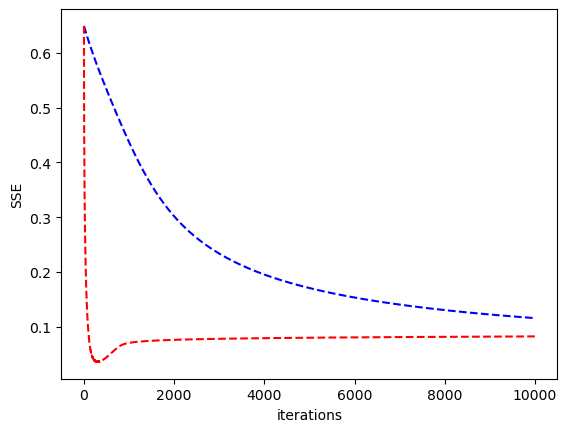

In [9]:
loss, parameters2 = train_model(x_train, y_train, 7, 10000, 0.01, False)
loss_with_rms_prop,parameters_with_rms_prop2=train_model_with_rms_prop(x_train, y_train, 7, 10000, 0.01, False)

plt.plot(range(len(loss)), loss, '--b')
plt.plot(range(len(loss_with_rms_prop)), loss_with_rms_prop, '--r')

plt.xlabel("iterations")
plt.ylabel("SSE")

In [10]:
#Training model with early stopped disbaled by passing hyperparameters {hidden_layers: 5,learning_rate: 0.001}

Text(0, 0.5, 'SSE')

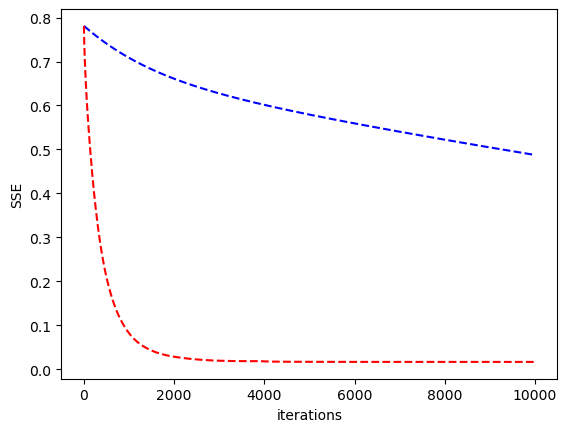

In [11]:
loss, parameters2 = train_model(x_train, y_train, 5, 10000, 0.001, False)
loss_with_rms_prop,parameters_with_rms_prop2=train_model_with_rms_prop(x_train, y_train, 5, 10000, 0.001, False)

plt.plot(range(len(loss)), loss, '--b')
plt.plot(range(len(loss_with_rms_prop)), loss_with_rms_prop, '--r')

plt.xlabel("iterations")
plt.ylabel("SSE")

In [12]:
#Passing test data csv

In [13]:
df_test = pd.read_csv("./wdbc/wdbc_test.csv", sep=";")
x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
print("y:", y_test)
print("x.shape:", x_test.shape)

y: [0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0
 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1
 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1]
x.shape: (171, 30)


In [14]:
x_test = normalization(x_test, means=means, sds=sds) # (close to) zero mean and unit variance

In [15]:
def test_model(x_test, y_test, parameters):
    A1, A2 = vectorized_forward_propagation(x_test, parameters)
    # get predictions
    yhat_test = (np.array(A2[0]) >= 0.5).astype(int)
    classes, X2 = confusion_matrix(y_test, yhat_test)
    print(classes)
    return accuracy(X2)

In [16]:
#Accuracy of test data

In [17]:
print("accuracy ",test_model(x_test, y_test, parameters1))
print("accuracy with RMSProp",test_model(x_test, y_test, parameters_with_rms_prop1))


[0, 1]
accuracy  0.9590643274853801
[0, 1]
accuracy with RMSProp 0.9532163742690059


In [18]:
print("accuracy ",test_model(x_test, y_test, parameters2))
print("accuracy with RMSProp",test_model(x_test, y_test, parameters_with_rms_prop2))

[0, 1]
accuracy  0.9590643274853801
[0, 1]
accuracy with RMSProp 0.9532163742690059
